<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Analyzing Historical Stock/Revenue Data and Building a Dashboard

Part of the IBM Data Analyst Professional Certificate

Course: Python Project for Data Science

<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Use yfinance to Extract Stock Data</li>
        <li>Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Use yfinance to Extract Stock Data</li>
        <li>Use Webscraping to Extract GME Revenue Data</li>
        <li>Plot Tesla Stock Graph</li>
        <li>Plot GameStop Stock Graph</li>
    </ul>


In [1]:
!pip install --upgrade yfinance==0.2.65
!pip install bs4
!pip install nbformat

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [7]:
# Check if yfinance is imported
try:
    import yfinance
    print(f"yfinance is imported successfully. Version: {yfinance.__version__}")
except ImportError:
    print("yfinance is not imported. Let's import it now.")
    # You can also try to import it
    !pip install yfinance
    import yfinance
    print(f"yfinance has been installed and imported. Version: {yfinance.__version__}")
except Exception as e:
    print(f"An error occurred: {e}")

yfinance is imported successfully. Version: 0.2.65


In [9]:
# Check if the Tesla ticker is correctly initialized
try:
    import yfinance as yf
    
    # Try to create a new Tesla ticker object
    tesla = yf.Ticker("TSLA")
    
    # Test if it works by getting some basic info
    info = tesla.info
    
    # Print some basic information to verify it's working
    print(f"Tesla ticker is correctly initialized.")
    print(f"Company name: {info.get('shortName', 'N/A')}")
    print(f"Current price: {info.get('currentPrice', 'N/A')}")
    
except Exception as e:
    print(f"Error initializing Tesla ticker: {e}")
    print("Try reinitializing the ticker with: tesla = yf.Ticker('TSLA')")

Tesla ticker is correctly initialized.
Company name: Tesla, Inc.
Current price: 351.67


In [11]:
import yfinance as yf
import requests
import json
import time

try:
    # Create the Tesla ticker object
    tesla = yf.Ticker("TSLA")
    
    # Add a print statement to verify the ticker was created
    print(f"Tesla ticker object created: {tesla}")
    
    # Try to get the data with error handling and timeout
    try:
        # Set a longer timeout for the request
        tesla_data = tesla.history(period="max")
        print("Data successfully retrieved")
        print(f"Shape of data: {tesla_data.shape}")
        print(tesla_data.head())
    except Exception as e:
        print(f"Error retrieving data: {type(e).__name__}: {str(e)}")
        
        # Try to get the raw response to see what's happening
        try:
            # This is a simplified approach - the actual implementation might differ
            session = requests.Session()
            url = f"https://query1.finance.yahoo.com/v8/finance/chart/TSLA"
            response = session.get(url, timeout=30)
            print(f"Status code: {response.status_code}")
            print(f"Response content: {response.text[:500]}...")  # Print first 500 chars
        except Exception as inner_e:
            print(f"Error getting raw response: {type(inner_e).__name__}: {str(inner_e)}")

except Exception as outer_e:
    print(f"Error creating ticker: {type(outer_e).__name__}: {str(outer_e)}")

Tesla ticker object created: yfinance.Ticker object <TSLA>
Data successfully retrieved
Shape of data: (3814, 7)
                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-0

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [13]:
tesla_data = tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function.

In [15]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage. Save the text of the response as a variable named `html_data`.


In [17]:
url ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [19]:
beautiful_soup = BeautifulSoup(html_data, "html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [23]:
import pandas as pd  # Make sure pandas is imported

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in beautiful_soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Method 1: Using pd.concat() instead of append
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
    
    # Alternative Method 2: Using loc
    # new_row = len(tesla_revenue)
    # tesla_revenue.loc[new_row] = [date, revenue]
    
print(tesla_revenue)

          Date  Revenue
0   2022-09-30  $21,454
1   2022-06-30  $16,934
2   2022-03-31  $18,756
3   2021-12-31  $17,719
4   2021-09-30  $13,757
5   2021-06-30  $11,958
6   2021-03-31  $10,389
7   2020-12-31  $10,744
8   2020-09-30   $8,771
9   2020-06-30   $6,036
10  2020-03-31   $5,985
11  2019-12-31   $7,384
12  2019-09-30   $6,303
13  2019-06-30   $6,350
14  2019-03-31   $4,541
15  2018-12-31   $7,226
16  2018-09-30   $6,824
17  2018-06-30   $4,002
18  2018-03-31   $3,409
19  2017-12-31   $3,288
20  2017-09-30   $2,985
21  2017-06-30   $2,790
22  2017-03-31   $2,696
23  2016-12-31   $2,285
24  2016-09-30   $2,298
25  2016-06-30   $1,270
26  2016-03-31   $1,147
27  2015-12-31   $1,214
28  2015-09-30     $937
29  2015-06-30     $955
30  2015-03-31     $940
31  2014-12-31     $957
32  2014-09-30     $852
33  2014-06-30     $769
34  2014-03-31     $621
35  2013-12-31     $615
36  2013-09-30     $431
37  2013-06-30     $405
38  2013-03-31     $562
39  2012-12-31     $306
40  2012-09-30  

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [25]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [27]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function.


In [29]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,$31
49,2010-06-30,$28
50,2010-03-31,$21
52,2009-09-30,$46
53,2009-06-30,$27


# Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [31]:
GameStop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [33]:
gme_data = GameStop.history(period="max")
gme_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2025-08-20 00:00:00-04:00,22.719999,22.770000,22.370001,22.629999,4388700,0.0,0.0
2025-08-21 00:00:00-04:00,22.600000,22.620001,22.379999,22.559999,4090600,0.0,0.0
2025-08-22 00:00:00-04:00,22.650000,23.030001,22.620001,22.889999,5551400,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function.


In [35]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage. Save the text of the response as a variable named `html_data`.


In [37]:
url ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [39]:
beautiful_soup = BeautifulSoup(html_data, "html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


In [43]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in beautiful_soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Use pd.concat() instead of append() which is deprecated
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
    
    # Note: This line should be outside the loop to avoid unnecessary operations in each iteration
    # Also fixed variable name from tesla_revenue to gme_revenue
    
# Move this outside the loop for better performance
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
    
print(gme_revenue)

          Date Revenue
0   2020-04-30  $1,021
1   2020-01-31  $2,194
2   2019-10-31  $1,439
3   2019-07-31  $1,286
4   2019-04-30  $1,548
..         ...     ...
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709

[62 rows x 2 columns]


Display the last five rows of the `gme_revenue` dataframe using the `tail` function.


In [45]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


# Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


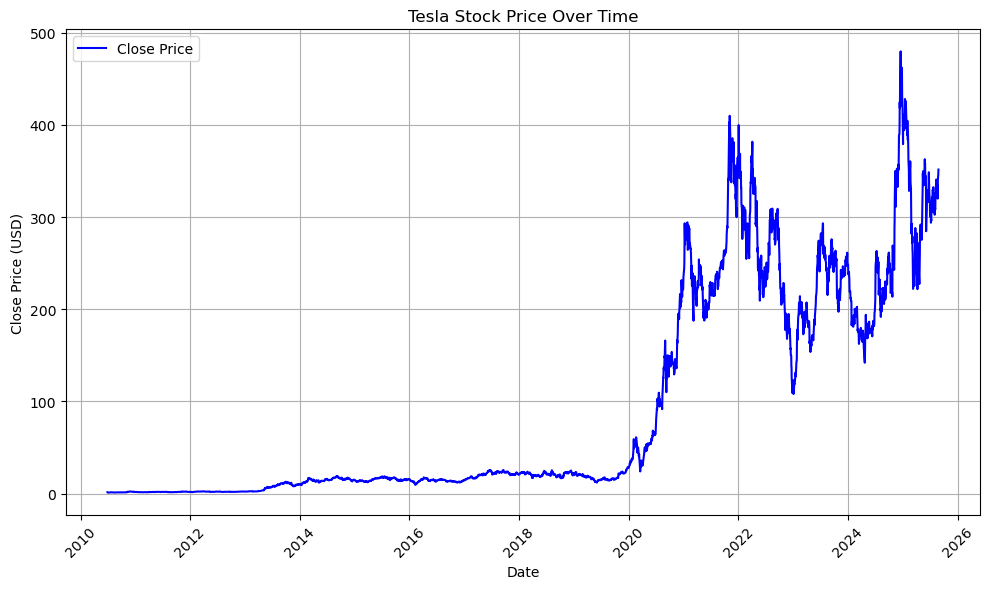

In [69]:
!pip install matplotlib

import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(10, 6))  # Set figure size
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')  # Plot Close price vs Date
    plt.xlabel('Date')  # X-axis label
    plt.ylabel('Close Price (USD)')  # Y-axis label
    plt.title(title)  # Set the title
    plt.legend()  # Show legend
    plt.grid(True)  # Add grid
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    plt.show()

# Call the make_graph function with tesla_data and a title
make_graph(tesla_data, 'Tesla Stock Price Over Time')

# Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


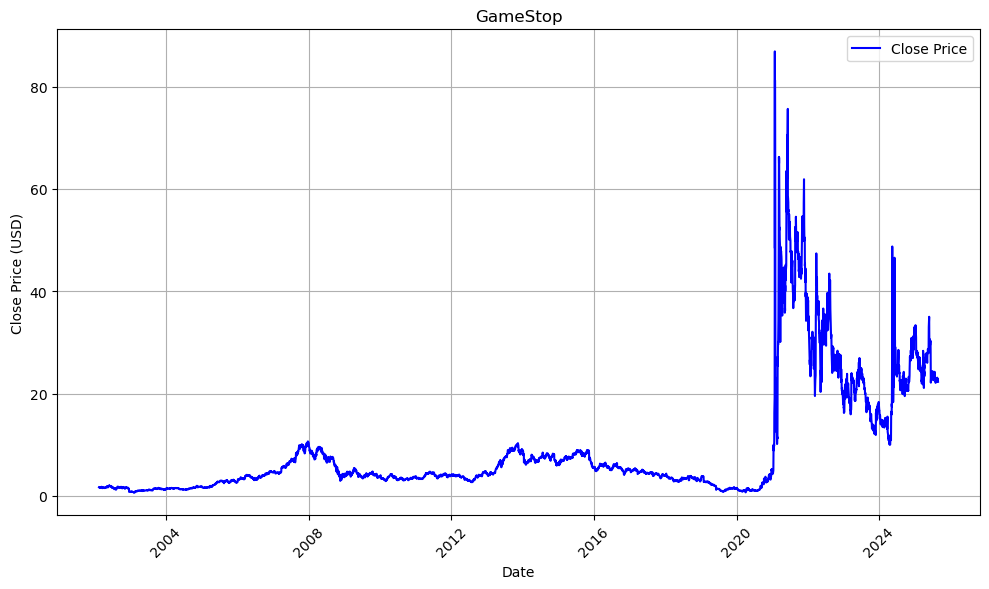

In [72]:
!pip install matplotlib

import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(gme_data, gme_revenue):
    plt.figure(figsize=(10, 6))  # Set figure size
    plt.plot(gme_data['Date'], gme_data['Close'], label='Close Price', color='blue')  # Plot Close price vs Date
    plt.xlabel('Date')  # X-axis label
    plt.ylabel('Close Price (USD)')  # Y-axis label
    plt.title('GameStop')  # Set the title
    plt.legend()  # Show legend
    plt.grid(True)  # Add grid
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    plt.show()

# Call the make_graph function with gme_data and a title
make_graph(gme_data, gme_revenue)

# Acknowledgments:

© IBM Corporation 2020. All rights reserved. 
Authors: Joseph Santarcangelo